In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Задание 1. df.iterrows()

In [35]:
df_taxi = pd.read_csv('train.csv')

In [23]:
df_taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df_taxi.shape

(50000, 8)

In [6]:
#d = 2r*np.arcsin(np.sqrt + *()

In [9]:
latitude_sin = np.sin((latitude_2 - latitude_1)/2)**2
latitude_cos_cos = np.cos(latitude_1)*np.cos(latitude_2)
longitude_sin = np.sin((longitude_2 - longitude_1)/2)**2


                

NameError: name 'latitude_2' is not defined

In [17]:
def haversine(latitude_1, longitude_1, latitude_2, longitude_2, r=6371):
    latitude_1, longitude_1, latitude_2, longitude_2 = [np.deg2rad(x) for x in (latitude_1, longitude_1, latitude_2, longitude_2)]
    latitude_sin = np.sin((latitude_2 - latitude_1)/2)**2
    latitude_cos_cos = np.cos(latitude_1)*np.cos(latitude_2)
    longitude_sin = np.sin((longitude_2 - longitude_1)/2)**2
    

    return 2 * r * np.arcsin(np.sqrt(latitude_sin+latitude_cos_cos*longitude_sin))

In [20]:
%timeit df_taxi['distance'] = pd.Series(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude) for i, row in df_taxi.iterrows())

6.14 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
df_taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


### Задание 2 pd.itertuples() именованные кортежи

In [25]:
%timeit df_taxi['distance'] = pd.Series(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude) for  row in df_taxi.itertuples())

1.01 s ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Задание 3 pd.apply()

In [27]:
%timeit df_taxi['distance'] = df_taxi[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']] \
    .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

1.99 s ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
longest = df_taxi['distance'].max()

In [ ]:
asfaasf
asfasf

### Задание 4 Векторизация

In [34]:
%timeit df_taxi['distance'] = haversine(df_taxi['pickup_latitude'],  df_taxi['pickup_longitude'], df_taxi['dropoff_latitude'], df_taxi['dropoff_longitude'])

7 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Задание 5 numpy array

In [36]:
%timeit df_taxi['distance'] = haversine(df_taxi['pickup_latitude'].values,  df_taxi['pickup_longitude'].values, df_taxi['dropoff_latitude'].values, df_taxi['dropoff_longitude'].values)

4.87 ms ± 81.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Задание 6 Поиск нулевых значений в координатах

In [48]:
df_taxi.query(' dropoff_latitude == 0 or dropoff_longitude == 0').shape

(958, 9)

In [47]:
df_taxi[['dropoff_latitude', 'dropoff_longitude']] \
    .eq(0) \
    .sum(1) \
    .gt(0) \
    .sum()

958

### Задание 7 построение графиков распределения

array([[<AxesSubplot:title={'center':'pickup_latitude'}>,
        <AxesSubplot:title={'center':'pickup_longitude'}>],
       [<AxesSubplot:title={'center':'dropoff_latitude'}>,
        <AxesSubplot:title={'center':'dropoff_longitude'}>]], dtype=object)

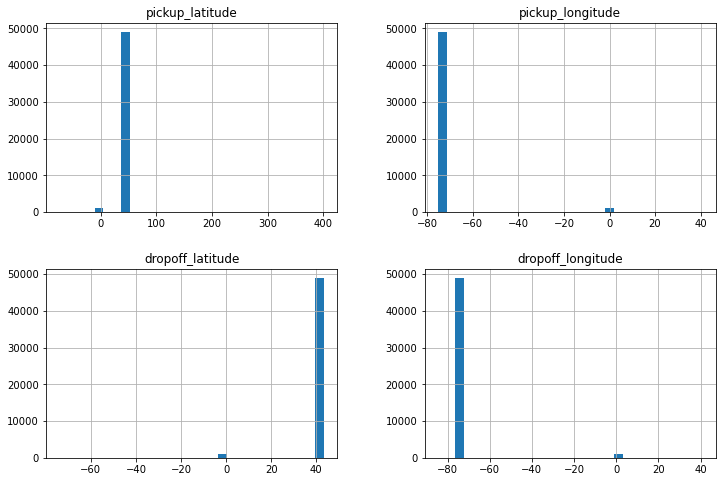

In [51]:
df_taxi[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].hist(figsize=(12,8), bins=30)

###  Задание 8 Фильтрация и самая дальняя поездка

In [52]:
df_taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [67]:
df_taxi_filtered = df_taxi.query('distance < 50') \
    .query('(10 < pickup_latitude < 120) and (pickup_longitude < -60) and (10 < dropoff_latitude) and (dropoff_longitude < -60)')

In [69]:
df_taxi_filtered.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988
